<a href="https://colab.research.google.com/github/BungPeerapat/Python_AI_Learn/blob/main/Data_Research_editPath_and_printImagesInFolder_deleteFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install botnoi==0.2.1

     |████████████████████████████████| 16.0MB 282kB/s 


In [ ]:
from botnoi import scrape as sc
from botnoi import cv
import os

# Mount Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ทำการ query

In [ ]:
# กำหนดตัวแปร query = ชื่อของข้อมูลที่ต้องการค้นหา
# กำหนดชื่อ className = ชื่อโฟลเดอร์กับชื่อรูปที่เราต้องการจัดเก็บ

query = 'Thevetia peruviana L. '
className = 'Thevetia peruviana L. '

In [ ]:
imgList = sc.get_image_urls(query,120) #เลขข้างหลัง เป็นการกำหนด range ของรูปภาพที่เราจะค้นหานะครับ ถ้าอยากได้ 50 รูปก็สามารถเปลี่ยนเลขข้างหลัง จาก 100 เป็น 50 ก็ได้ครับ

complete: 0.00%
complete: 39.17%
complete: 76.67%
completed


In [ ]:
#imgList2 = sc.get_image_urls('พืชไม่มีพิษ',100)

In [ ]:
imgList #เป็นการเรียก url image ของ พืชมีพิษ

['https://i.pinimg.com/originals/30/03/22/300322d0ed38ce29561eeef2cd57c3e4.jpg',
 'https://i1.rgstatic.net/publication/290983975_A_Review_on_Thevetia_peruviana/links/57aaef1a08ae3765c3b6e9c8/largepreview.png',
 'https://cdn.plantatlas.org/img/specimens/USF/164404.jpg',
 'https://i.ytimg.com/vi/vAPRW3U9WiU/maxresdefault.jpg',
 'https://i.pinimg.com/originals/bb/9f/39/bb9f39f8a66d53c5c4c1ff95d4a01a2e.jpg',
 'https://i1.rgstatic.net/publication/342181643_Chemical_profiling_of_Thevetia_peruviana_leaves_cytotoxic_active_extracts_enhanced_by_microemulsion_formulation/links/5ef3639e4585153fb1b0e984/largepreview.png',
 'https://i1.rgstatic.net/publication/282812249_Thevetia_peruviana/links/5ee2413292851ce9e7d94915/largepreview.png',
 'https://calphotos.berkeley.edu/imgs/512x768/0000_0000/0112/0258.jpeg',
 'https://wildlifeofhawaii.com/images/flowers/Thevetia-peruviana-1.jpg',
 'https://cdn.plantatlas.org/img/specimens/USF/285813.jpg',
 'https://c8.alamy.com/comp/2BY7JCK/yellow-cascabela-thevet

In [ ]:
#imgList2 #เป็นการเรียก url image ของ พืชไม่มีพิษ

In [ ]:
def getthumbdisplay(imgList):
  res = ''
  for img in imgList:
    res = res + gethtmlimage(img)
  return res

In [ ]:
def gethtmlimage(imgurl):
  htmlTag = '''
  <a target="_blank" href="%s">
    <img src="%s" alt="Forest">
  </a>
  '''%(imgurl,imgurl)
  return htmlTag


In [ ]:
import IPython
from google.colab import output
htmlimage = getthumbdisplay(imgList)
html = '''<style>
img {
  border: 1px solid #ddd; /* Gray border */
  border-radius: 4px;  /* Rounded border */
  padding: 5px; /* Some padding */
  width: 150px; /* Set a small width */
}

/* Add a hover effect (blue shadow) */
img:hover {
  box-shadow: 0 0 2px 1px rgba(0, 140, 186, 0.5);
}
</style>
<body>

%s

</body>'''%htmlimage
display(IPython.display.HTML(html))

In [ ]:
'''
import IPython
from google.colab import output
htmlimage = getthumbdisplay(imgList2)
html = <style>
img {
  border: 1px solid #ddd; /* Gray border */
  border-radius: 4px;  /* Rounded border */
  padding: 5px; /* Some padding */
  width: 150px; /* Set a small width */
}

/* Add a hover effect (blue shadow) */
img:hover {
  box-shadow: 0 0 2px 1px rgba(0, 140, 186, 0.5);
}
</style>
<body>

%s

</body> %htmlimage
display(IPython.display.HTML(html))
'''

'\nimport IPython\nfrom google.colab import output\nhtmlimage = getthumbdisplay(imgList2)\nhtml = <style>\nimg {\n  border: 1px solid #ddd; /* Gray border */\n  border-radius: 4px;  /* Rounded border */\n  padding: 5px; /* Some padding */\n  width: 150px; /* Set a small width */\n}\n\n/* Add a hover effect (blue shadow) */\nimg:hover {\n  box-shadow: 0 0 2px 1px rgba(0, 140, 186, 0.5);\n}\n</style>\n<body>\n\n%s\n\n</body> %htmlimage\ndisplay(IPython.display.HTML(html))\n'

# **ทำ extract feature**

In [ ]:
import urllib.request

In [ ]:
def extractimagefeat(query,range):
  
  #create folder for images
  foldername = '/content/drive/MyDrive/Datasets/Image/'+ className      ### <== กำหนด folder path ไปที่ drive ของ boinoicv.fun6@gmail.com เลยค่ะ
  isdir = os.path.isdir(foldername)  
  #check if folder exist
  if not isdir:
    #create directory
    os.makedirs(foldername)

  #create folder for features 
  folderDataname = '/content/drive/MyDrive/Datasets/Data/'+ className   ### <== กำหนด folder path ไปที่ drive ของ boinoicv.fun6@gmail.com เลยค่ะ
  isdirdata = os.path.isdir(folderDataname) 
  if not isdirdata:
    #create directory
    os.makedirs(folderDataname)

  #get images from google search
  imglist = sc.get_image_urls(query,range)
  i = 1
  for img in imglist[0:range] :
    countani = 0
    #extract image features from each images and save to files
    try:
      #Animation zone
      print(i)
      if(i%10 == 0):
        print("[ ")
        persendata = i % 100 * 10
        countani += 1
        for imgsecond in range(countani):
          print("=")
        print(" ]","||","Persen Data : ",persendata," % ","Data Load : ",i,"/","120",end="")
      if(i == 120):
        print("[ ========== ]","|| Persen Data :",persondata)

      #Animation zone
      #create image path and save
      savepath = foldername + '/' + className + '_'+str(i)+'.jpeg'
      urllib.request.urlretrieve(img, savepath)

      # create data path and save
      savepathData = folderDataname+ '/' + className + '_'+str(i)+'.p'
      
      a = cv.image(img)
      a.getresnet50()
      a.save(savepathData)
      i = i + 1
    except:
      i = i + 1
      pass
  return 'complete'

In [ ]:
extractimagefeat(query,120) #extractimagefeat('ชื่อของข้อมูลที่ต้องการค้นหา',ขอบเขตของรูปที่ต้องการหา)

complete: 0.00%
complete: 39.17%
complete: 80.00%
completed
1
2
3
4
5
6
7
8
9
10
[ 
11
12
13
14
15
16
17
18
19
20
[ 
21
22
23
24
25
26
27
28
29
30
[ 
31
32
33
34
35
36
37
38
39
40
[ 
41
42
43
44
45
46
47
48
49
50
[ 
51
52
53
54
55
56
57
58
59
60
[ 
61
62
63
64
65
66
67
68
69
70
[ 
71
72
73
74
75
76
77
78
79
80
[ 
81
82
83
84
85
86
87
88
89
90
[ 
91
92
93
94
95
96
97
98
99
100
[ 
101
102
103
104
105
106
107
108
109
110
[ 
111
112
113
114
115
116
117
118
119
120
[ 


'complete'

In [ ]:
#extractimagefeat('พืชไม่มีพิษ')

In [ ]:
#command to clear or files
#rm -rf *

# ลอง plot เพื่อคัดรูปที่ใช้ไม่ได้ออก

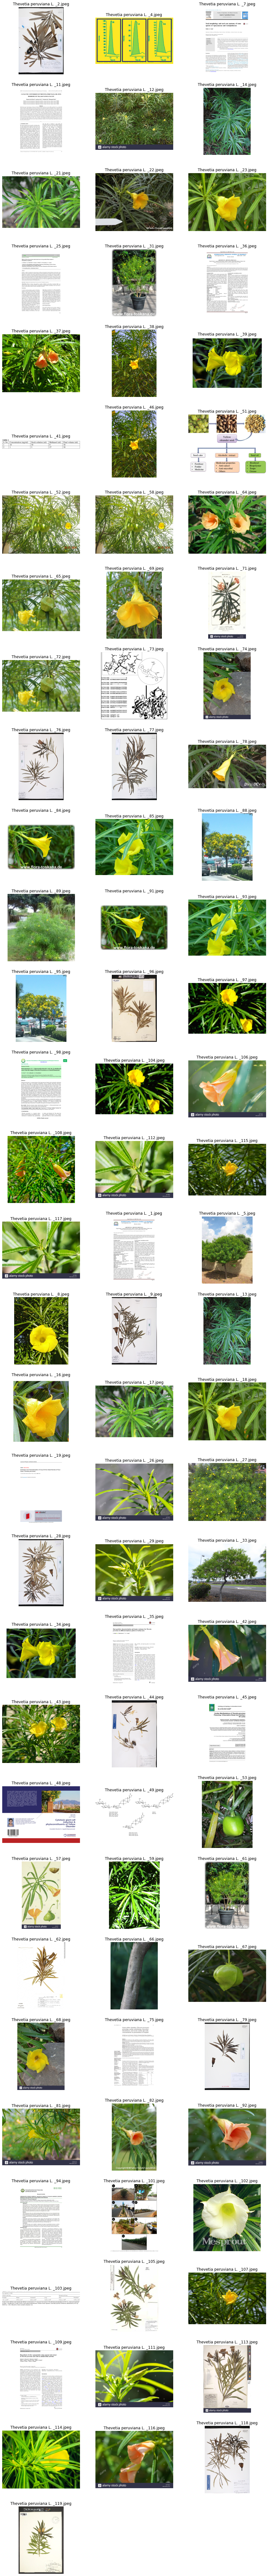

In [ ]:
# หลังจากลบรูปแล้วสามารถกดซ้ำได้เพื่อเช็คความเรียบร้อยค่ะ

import matplotlib.pyplot as plt
import PIL
%matplotlib inline

plt.figure(figsize=(15, 150))
for i, imgName in enumerate(os.listdir('/content/drive/MyDrive/Datasets/Image/'+className)) :
  #print(imgName)
  try:
    img = PIL.Image.open(os.path.join('/content/drive/MyDrive/Datasets/Image/'+className, imgName))
  except:
    print('loading image : ', imgName ,' has an error')
  plt.subplot(len(os.listdir('/content/drive/MyDrive/Datasets/Image/'+className))//3 + 1, 3, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(imgName.split('/')[-1])
plt.show()

In [ ]:
#rm -rf /content/drive/MyDrive/Datasets/Data/Jatropha\ podagrica\ Hook

In [ ]:
#rm -rf /content/drive/MyDrive/Datasets/Image/Jatropha\ podagrica\ Hook

In [ ]:
# เช็คจากรูปที่ plot ออกมา ต้องการลบรูปไหน ใส่ index ของรูปใน list ด้านล่างเลยนะคะ
indexToDelete = [2,4,7,11,25,36,41,5,71,73,76,77,88,96,98,1,9,19,28,33,35,44,45,49,57,61,62,66,75,79,94,48,101,103,105,109,113,118,119] 

In [ ]:
for idx in indexToDelete :
  imgFileName = '/content/drive/MyDrive/Datasets/Image/'+ className+'/'+className + '_'+str(idx)+'.jpeg'
  dataFileName = '/content/drive/MyDrive/Datasets/Data/'+ className+'/'+className + '_'+str(idx)+'.p'
  
  if os.path.exists(imgFileName) :
    #print(imgFileName, ' exists')
    os.remove(imgFileName)

  if os.path.exists(dataFileName) :
    #print(dataFileName, ' exists')
    os.remove(dataFileName)

# Create Dataset

In [ ]:
"""
import glob
import pandas as pd
import pickle
def createdataset():
  imgfolder = glob.glob('images/*')
  for cls in imgfolder:
    clsset = pd.DataFrame()
    pList = glob.glob(cls+'/*')
    featvec = []
    dataset = []
    for p in pList:
      dat = pickle.load(open(p,'rb'))
      featvec.append(dat.resnet50)

    clsset['feature'] = featvec
    cls = cls.split('/')[-1]
    clsset['label'] = cls
    dataset.append(clsset)
"""

"\nimport glob\nimport pandas as pd\nimport pickle\ndef createdataset():\n  imgfolder = glob.glob('images/*')\n  for cls in imgfolder:\n    clsset = pd.DataFrame()\n    pList = glob.glob(cls+'/*')\n    featvec = []\n    dataset = []\n    for p in pList:\n      dat = pickle.load(open(p,'rb'))\n      featvec.append(dat.resnet50)\n\n    clsset['feature'] = featvec\n    cls = cls.split('/')[-1]\n    clsset['label'] = cls\n    dataset.append(clsset)\n"

In [ ]:
"""
dataset = createdataset()
"""

'\ndataset = createdataset()\n'

In [ ]:
"""
dataset
"""

'\ndataset\n'

In [ ]:
"""
fimgfolder = glob.glob('images/*')
for cls in imgfolder:
  imgList = glob.glob(cls+'/*')
imgList
"""

"\nfimgfolder = glob.glob('images/*')\nfor cls in imgfolder:\n  imgList = glob.glob(cls+'/*')\nimgList\n"